<a href="https://colab.research.google.com/github/Ehsantba/Machine-Learning/blob/main/Classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on MNIST Dataset
   +Evaluation Methods


## Data Prepration

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [3]:
mnist.data.shape

(70000, 784)

In [4]:
mnist.target.shape

(70000,)

In [5]:
mnist.target[0]

'5'

In [6]:
X , y = mnist["data"], mnist["target"]

In [7]:
 def plot_digit(image_data):
    plt.figure(figsize=(2, 2))
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

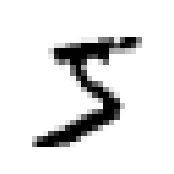

In [8]:
plot_digit(mnist.data[0])

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Model Design + training

### Binary Classification on Class 5

In [10]:
y_train_5 = (y_train == '5') # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [11]:
y_test_5.shape

(10000,)

In [12]:
y_test_5.sum()

np.int64(892)

In [13]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
 sgd_clf.predict(X_train[0].reshape(1, -1))

array([ True])

In [15]:
y_train[1]

'0'

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [18]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [19]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [20]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [21]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [23]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847